In [1]:
from pyspark.sql import SparkSession

In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [3]:
spark = SparkSession.builder.appName("Uber_ride_analysis").config("spark.sql.legacy.timeParserPolicy", "LEGACY").getOrCreate()


In [16]:
df = spark.read.csv('Uber - 2016.csv', header = True, inferSchema= True)


In [17]:
df.show()

+---------------+---------------+--------+-----------------+---------------+-----+---------------+
|     START_DATE|       END_DATE|CATEGORY|            START|           STOP|MILES|        PURPOSE|
+---------------+---------------+--------+-----------------+---------------+-----+---------------+
| 1/1/2016 21:11| 1/1/2016 21:17|Business|      Fort Pierce|    Fort Pierce|  5.1| Meal/Entertain|
|  1/2/2016 1:25|  1/2/2016 1:37|Business|      Fort Pierce|    Fort Pierce|  5.0|           NULL|
| 1/2/2016 20:25| 1/2/2016 20:38|Business|      Fort Pierce|    Fort Pierce|  4.8|Errand/Supplies|
| 1/5/2016 17:31| 1/5/2016 17:45|Business|      Fort Pierce|    Fort Pierce|  4.7|        Meeting|
| 1/6/2016 14:42| 1/6/2016 15:49|Business|      Fort Pierce|West Palm Beach| 63.7| Customer Visit|
| 1/6/2016 17:15| 1/6/2016 17:19|Business|  West Palm Beach|West Palm Beach|  4.3| Meal/Entertain|
| 1/6/2016 17:30| 1/6/2016 17:35|Business|  West Palm Beach|     Palm Beach|  7.1|        Meeting|
| 1/7/2016

In [7]:
uber_df = df.na.drop()

In [8]:
uber_df.summary().show()

+-------+--------------+--------------+--------+-------------+-------------+------------------+--------------+
|summary|    START_DATE|      END_DATE|CATEGORY|        START|         STOP|             MILES|       PURPOSE|
+-------+--------------+--------------+--------+-------------+-------------+------------------+--------------+
|  count|           653|           653|     653|          653|          653|               653|           653|
|   mean|          NULL|          NULL|    NULL|         NULL|         NULL|11.196324655436444|          NULL|
| stddev|          NULL|          NULL|    NULL|         NULL|         NULL|22.986428750819968|          NULL|
|    min|1/1/2016 21:11|1/1/2016 21:17|Business|         Apex|        Agnew|               0.5|Airport/Travel|
|    25%|          NULL|          NULL|    NULL|         NULL|         NULL|               3.2|          NULL|
|    50%|          NULL|          NULL|    NULL|         NULL|         NULL|               6.4|          NULL|
|

In [9]:
uber_df.printSchema()

root
 |-- START_DATE: string (nullable = true)
 |-- END_DATE: string (nullable = true)
 |-- CATEGORY: string (nullable = true)
 |-- START: string (nullable = true)
 |-- STOP: string (nullable = true)
 |-- MILES: double (nullable = true)
 |-- PURPOSE: string (nullable = true)



In [14]:
from pyspark.sql.functions import to_date, when , col, to_timestamp

In [18]:
from pyspark.sql.functions import to_timestamp, hour, date_format

# Assuming your DataFrame is named uber_df
# Convert 'START_DATE' and 'END_DATE' columns to timestamp format
uber_df = uber_df.withColumn("START_DATE", to_timestamp("START_DATE", "M/d/yyyy HH:mm"))
uber_df = uber_df.withColumn("END_DATE", to_timestamp("END_DATE", "M/d/yyyy HH:mm"))

# Extract date (YYYY-MM-DD) and hour (HH)
uber_df = uber_df.withColumn("START_DATE_ONLY", date_format("START_DATE", "yyyy-MM-dd"))
uber_df = uber_df.withColumn("START_HOUR", hour("START_DATE"))

uber_df = uber_df.withColumn("END_DATE_ONLY", date_format("END_DATE", "yyyy-MM-dd"))
uber_df = uber_df.withColumn("END_HOUR", hour("END_DATE"))

# Show the result
uber_df.select("START_DATE", "START_DATE_ONLY", "START_HOUR", "END_DATE", "END_DATE_ONLY", "END_HOUR").show(truncate=False)


+-------------------+---------------+----------+-------------------+-------------+--------+
|START_DATE         |START_DATE_ONLY|START_HOUR|END_DATE           |END_DATE_ONLY|END_HOUR|
+-------------------+---------------+----------+-------------------+-------------+--------+
|2016-01-01 21:11:00|2016-01-01     |21        |2016-01-01 21:17:00|2016-01-01   |21      |
|2016-01-02 20:25:00|2016-01-02     |20        |2016-01-02 20:38:00|2016-01-02   |20      |
|2016-01-05 17:31:00|2016-01-05     |17        |2016-01-05 17:45:00|2016-01-05   |17      |
|2016-01-06 14:42:00|2016-01-06     |14        |2016-01-06 15:49:00|2016-01-06   |15      |
|2016-01-06 17:15:00|2016-01-06     |17        |2016-01-06 17:19:00|2016-01-06   |17      |
|2016-01-06 17:30:00|2016-01-06     |17        |2016-01-06 17:35:00|2016-01-06   |17      |
|2016-01-07 13:27:00|2016-01-07     |13        |2016-01-07 13:33:00|2016-01-07   |13      |
|2016-01-10 08:05:00|2016-01-10     |8         |2016-01-10 08:25:00|2016-01-10  

In [19]:
uber_df.printSchema()


root
 |-- START_DATE: timestamp (nullable = true)
 |-- END_DATE: timestamp (nullable = true)
 |-- CATEGORY: string (nullable = true)
 |-- START: string (nullable = true)
 |-- STOP: string (nullable = true)
 |-- MILES: double (nullable = true)
 |-- PURPOSE: string (nullable = true)
 |-- START_DATE_ONLY: string (nullable = true)
 |-- START_HOUR: integer (nullable = true)
 |-- END_DATE_ONLY: string (nullable = true)
 |-- END_HOUR: integer (nullable = true)



In [20]:
uber_df = uber_df.withColumn("START_DATE_ONLY", to_date("START_DATE_ONLY"))
uber_df = uber_df.withColumn("END_DATE_ONLY", to_date("END_DATE_ONLY"))

In [21]:
uber_df.printSchema()

root
 |-- START_DATE: timestamp (nullable = true)
 |-- END_DATE: timestamp (nullable = true)
 |-- CATEGORY: string (nullable = true)
 |-- START: string (nullable = true)
 |-- STOP: string (nullable = true)
 |-- MILES: double (nullable = true)
 |-- PURPOSE: string (nullable = true)
 |-- START_DATE_ONLY: date (nullable = true)
 |-- START_HOUR: integer (nullable = true)
 |-- END_DATE_ONLY: date (nullable = true)
 |-- END_HOUR: integer (nullable = true)



In [22]:
uber_df.printSchema()


root
 |-- START_DATE: timestamp (nullable = true)
 |-- END_DATE: timestamp (nullable = true)
 |-- CATEGORY: string (nullable = true)
 |-- START: string (nullable = true)
 |-- STOP: string (nullable = true)
 |-- MILES: double (nullable = true)
 |-- PURPOSE: string (nullable = true)
 |-- START_DATE_ONLY: date (nullable = true)
 |-- START_HOUR: integer (nullable = true)
 |-- END_DATE_ONLY: date (nullable = true)
 |-- END_HOUR: integer (nullable = true)



In [23]:
uber_df.columns

['START_DATE',
 'END_DATE',
 'CATEGORY',
 'START',
 'STOP',
 'MILES',
 'PURPOSE',
 'START_DATE_ONLY',
 'START_HOUR',
 'END_DATE_ONLY',
 'END_HOUR']

In [24]:
uber_df = uber_df.selectExpr("START_DATE as start_date", "END_DATE as end_date", "CATEGORY as category", "START as start", "STOP as stop", "MILES as miles", "PURPOSE as purpose", "START_DATE_ONLY as start_date_only", "START_HOUR as start_hour", "END_DATE_ONLY as end_date_only", "END_HOUR as end_hour")
uber_df.show()

+-------------------+-------------------+--------+-----------------+---------------+-----+---------------+---------------+----------+-------------+--------+
|         start_date|           end_date|category|            start|           stop|miles|        purpose|start_date_only|start_hour|end_date_only|end_hour|
+-------------------+-------------------+--------+-----------------+---------------+-----+---------------+---------------+----------+-------------+--------+
|2016-01-01 21:11:00|2016-01-01 21:17:00|Business|      Fort Pierce|    Fort Pierce|  5.1| Meal/Entertain|     2016-01-01|        21|   2016-01-01|      21|
|2016-01-02 20:25:00|2016-01-02 20:38:00|Business|      Fort Pierce|    Fort Pierce|  4.8|Errand/Supplies|     2016-01-02|        20|   2016-01-02|      20|
|2016-01-05 17:31:00|2016-01-05 17:45:00|Business|      Fort Pierce|    Fort Pierce|  4.7|        Meeting|     2016-01-05|        17|   2016-01-05|      17|
|2016-01-06 14:42:00|2016-01-06 15:49:00|Business|      Fo

Column: start_date
0
Column: end_date
0
Column: category
0
Column: start
0
Column: stop
0
Column: miles
0
Column: purpose
0


In [21]:
from pyspark.sql.functions import hour, when
uber_df = uber_df.withColumn("Time_label", when((hour('START_DATE') >= 5) & (hour('START_DATE') < 12), "morning")
                            .when((hour('START_DATE') >= 12) & (hour('START_DATE') < 17), "afternoon")
                            .when((hour('START_DATE') >= 17) & (hour('START_DATE') < 20), "evening").otherwise("night"))

In [22]:
uber_df = uber_df.withColumn("fare", uber_df["MILES"] * 2.5)

In [23]:
from pyspark.sql.functions import date_format

uber_df = uber_df.withColumn("month", date_format("start_date", "MMMM"))

uber_df = uber_df.withColumn("day", date_format("start_date", "EEEE"))


In [24]:
uber_df.show()

+-------------------+-------------------+--------+-----------------+---------------+-----+---------------+----------+------+-------+---------+
|         start_date|           end_date|category|            start|           stop|miles|        purpose|Time_label|  fare|  month|      day|
+-------------------+-------------------+--------+-----------------+---------------+-----+---------------+----------+------+-------+---------+
|2016-01-01 21:11:00|2016-01-01 21:17:00|Business|      Fort Pierce|    Fort Pierce|  5.1| Meal/Entertain|     night| 12.75|January|   Friday|
|2016-01-02 20:25:00|2016-01-02 20:38:00|Business|      Fort Pierce|    Fort Pierce|  4.8|Errand/Supplies|     night|  12.0|January| Saturday|
|2016-01-05 17:31:00|2016-01-05 17:45:00|Business|      Fort Pierce|    Fort Pierce|  4.7|        Meeting|   evening| 11.75|January|  Tuesday|
|2016-01-06 14:42:00|2016-01-06 15:49:00|Business|      Fort Pierce|West Palm Beach| 63.7| Customer Visit| afternoon|159.25|January|Wednesday|

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
 

In [26]:
!pip install disutils


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
!where python  # For Windows


c:\Users\Mohak Singh\Desktop\Desktop Main\Projects\Uber_data_analysis\.venv\Scripts\python.exe
C:\Users\Mohak Singh\AppData\Local\Programs\Python\Python312\python.exe
C:\Users\Mohak Singh\AppData\Local\Microsoft\WindowsApps\python.exe


INFO: Could not find "#".
INFO: Could not find "For".
INFO: Could not find "Windows".


In [28]:
data = uber_df.toPandas()


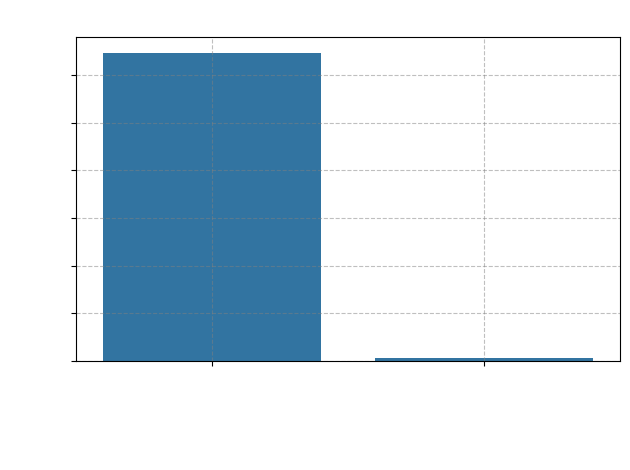

In [29]:
sns.countplot(x=data["category"])
plt.title("Value Counts of Feature: CATEGORY")
plt.xticks(rotation=45)
plt.title("Value Counts of Feature: Category", fontsize=18, weight='bold', color='white')
plt.xlabel("Category", fontsize=14, weight='bold', color='white')
plt.ylabel("Count", fontsize=14, weight='bold', color='white')

plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.grid(True, linestyle='--', color='gray', alpha=0.5) 
plt.tight_layout()

plt.show()


C:\Users\Mohak Singh\AppData\Local\Temp\ipykernel_22400\480466687.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["purpose"], palette="viridis")


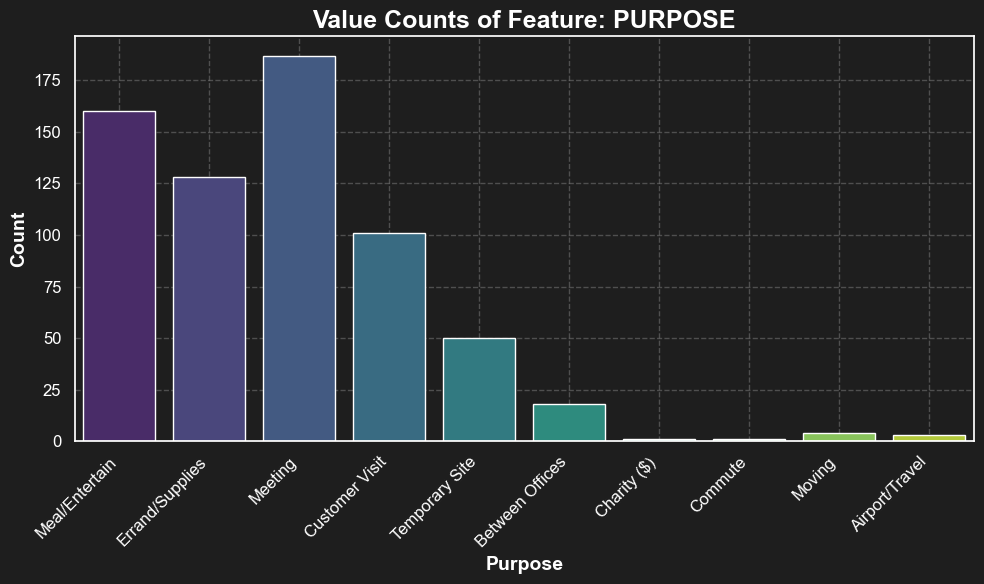

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid", palette="muted", rc={"axes.facecolor": "#1e1e1e", "figure.facecolor": "#1e1e1e"})

plt.figure(figsize=(10, 6))
sns.countplot(x=data["purpose"], palette="viridis") 

plt.title("Value Counts of Feature: PURPOSE", fontsize=18, weight='bold', color='white')
plt.xlabel("Purpose", fontsize=14, weight='bold', color='white')
plt.ylabel("Count", fontsize=14, weight='bold', color='white')

plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.grid(True, linestyle='--', color='gray', alpha=0.5) 
plt.tight_layout()

plt.show()


C:\Users\Mohak Singh\AppData\Local\Temp\ipykernel_22400\2864141125.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['day'], palette='viridis')


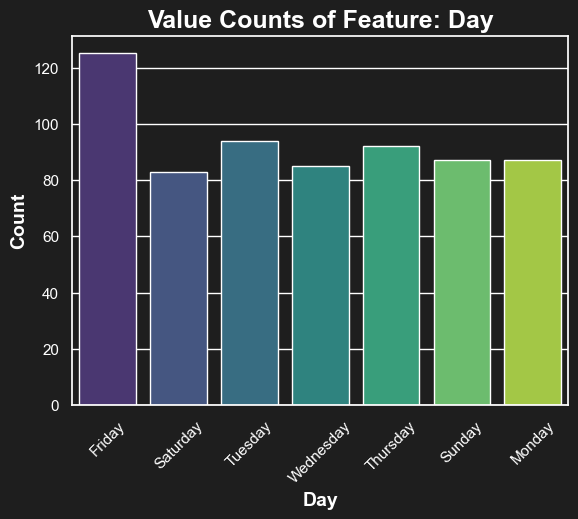

In [31]:
sns.countplot(x = data['day'], palette='viridis')
plt.title("Value Counts of Feature: DAY")
plt.xticks(rotation=45, color = 'white')
plt.yticks(color = 'white')
plt.title("Value Counts of Feature: Day", fontsize=18, weight='bold', color='white')
plt.xlabel("Day", fontsize=14, weight='bold', color='white')
plt.ylabel("Count", fontsize=14, weight='bold', color='white')
plt.show()

C:\Users\Mohak Singh\AppData\Local\Temp\ipykernel_22400\3107251311.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['month'], palette='viridis')


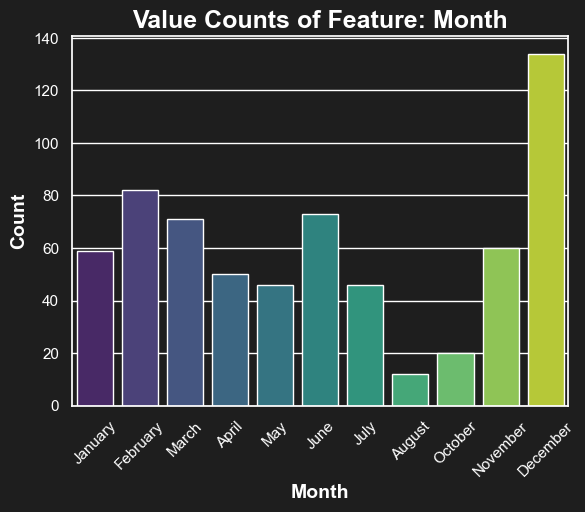

In [32]:
sns.countplot(x = data['month'], palette='viridis')
plt.title("Number of travelers month wise")
plt.xticks(rotation=45, color = 'white')
plt.yticks(color = 'white')
plt.title("Value Counts of Feature: Month", fontsize=18, weight='bold', color='white')
plt.xlabel("Month", fontsize=14, weight='bold', color='white')
plt.ylabel("Count", fontsize=14, weight='bold', color='white')
plt.show()


C:\Users\Mohak Singh\AppData\Local\Temp\ipykernel_22400\1636861399.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['Time_label'], palette='viridis')


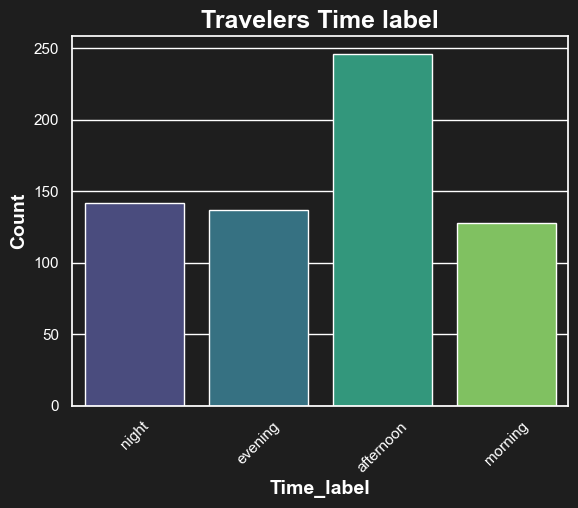

In [33]:
sns.countplot(x = data['Time_label'], palette='viridis')
plt.title("Travelers Time label", fontsize=18, weight='bold', color='white')
plt.xticks(rotation=45, color = 'white')
plt.yticks(color = 'white')
plt.xlabel("Time_label", fontsize=14, weight='bold', color='white')
plt.ylabel("Count", fontsize=14, weight='bold', color='white')
plt.show()


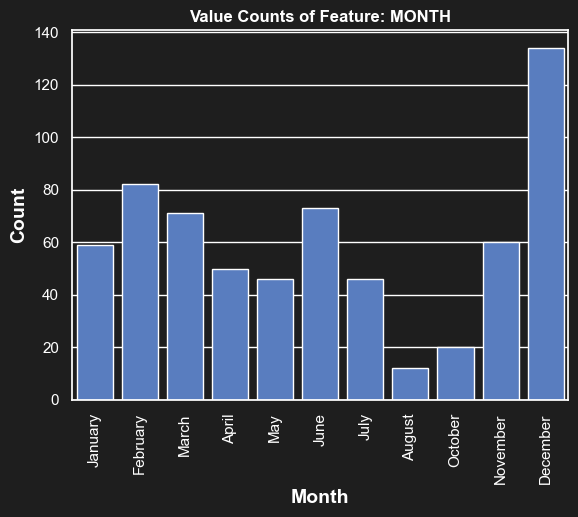

In [37]:
sns.countplot(x=data["month"])
plt.title(("Value Counts of Feature: MONTH"), weight = 'bold', color = 'white')
plt.xticks(rotation=90, color = "white")
plt.yticks(color = "white")
plt.xlabel("Month", fontsize=14, weight='bold', color='white')
plt.ylabel("Count", fontsize=14, weight='bold', color='white')
plt.show()



C:\Users\Mohak Singh\AppData\Local\Temp\ipykernel_22400\1398352250.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data['month'], y = data['miles'], palette='viridis')


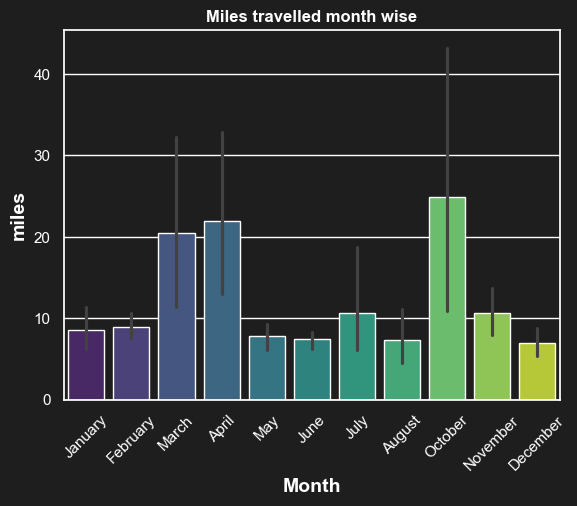

In [38]:
sns.barplot(x = data['month'], y = data['miles'], palette='viridis')
plt.title("Miles travelled month wise", color = "white", weight = 'bold')
plt.xticks(rotation=45, color = 'white')
plt.yticks(color = 'white')
plt.xlabel("Month", fontsize=14, weight='bold', color='white')
plt.ylabel("miles", fontsize=14, weight='bold', color='white')
plt.show()

C:\Users\Mohak Singh\AppData\Local\Temp\ipykernel_22400\314521813.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = data['category'], y = data['miles'], palette='viridis')


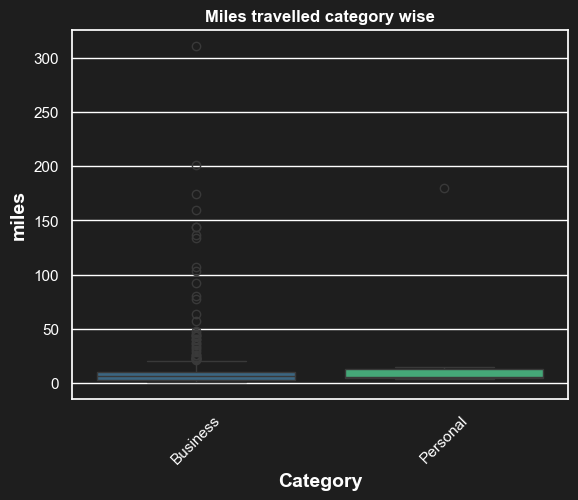

In [39]:
sns.boxplot(x = data['category'], y = data['miles'], palette='viridis')
plt.title("Miles travelled category wise", color = "white", weight = 'bold')
plt.xticks(rotation=45, color = 'white')
plt.yticks(color = 'white')
plt.xlabel("Category", fontsize=14, weight='bold', color='white')
plt.ylabel("miles", fontsize=14, weight='bold', color='white')
plt.show()


C:\Users\Mohak Singh\AppData\Local\Temp\ipykernel_22400\1305083300.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = data['category'], x = data['fare'], palette='viridis')


<Axes: xlabel='fare', ylabel='category'>

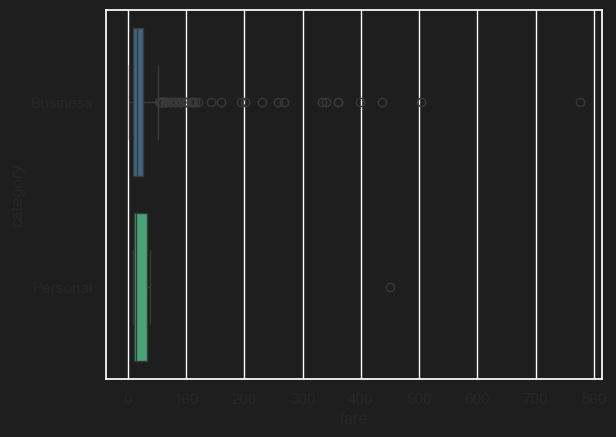

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

## From here

## till here

In [43]:
import tensorflow as tf

In [49]:
import pandas as pd

In [40]:
df1 = uber_df.toPandas()
df1

,start_date,end_date,category,start,stop,miles,purpose,start_date_only,start_hour,end_date_only,end_hour
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,2016-01-01,21
1,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,2016-01-02,20
2,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,2016-01-05,17
3,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,2016-01-06,15
4,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17,2016-01-06,17
...,...,...,...,...,...,...,...,...,...,...,...
648,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,2016-12-31,1,2016-12-31,1
649,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,2016-12-31,13,2016-12-31,13
650,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,2016-12-31,15,2016-12-31,15
651,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,2016-12-31,21,2016-12-31,21


In [41]:
df1.drop(['start_date', 'end_date', 'purpose', 'category'], axis = 1, inplace = True)

In [42]:
df1.head()

,start,stop,miles,start_date_only,start_hour,end_date_only,end_hour
0,Fort Pierce,Fort Pierce,5.1,2016-01-01,21,2016-01-01,21
1,Fort Pierce,Fort Pierce,4.8,2016-01-02,20,2016-01-02,20
2,Fort Pierce,Fort Pierce,4.7,2016-01-05,17,2016-01-05,17
3,Fort Pierce,West Palm Beach,63.7,2016-01-06,14,2016-01-06,15
4,West Palm Beach,West Palm Beach,4.3,2016-01-06,17,2016-01-06,17


In [43]:
df1['fare'] = df1['miles'] * 2.5


In [44]:
import joblib

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start            653 non-null    object 
 1   stop             653 non-null    object 
 2   miles            653 non-null    float64
 3   start_date_only  653 non-null    object 
 4   start_hour       653 non-null    int32  
 5   end_date_only    653 non-null    object 
 6   end_hour         653 non-null    int32  
 7   fare             653 non-null    float64
 8   start_encoded    653 non-null    int64  
 9   stop_encoed      653 non-null    int64  
dtypes: float64(2), int32(2), int64(2), object(4)
memory usage: 46.0+ KB


In [50]:
df1['start_date_only'] = pd.to_datetime(df1['start_date_only'])
df1['end_date_only'] = pd.to_datetime(df1['end_date_only'])


In [52]:
df1['day_of_week'] = df1['start_date_only'].dt.dayofweek


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start            653 non-null    object        
 1   stop             653 non-null    object        
 2   miles            653 non-null    float64       
 3   start_date_only  653 non-null    datetime64[ns]
 4   start_hour       653 non-null    int32         
 5   end_date_only    653 non-null    datetime64[ns]
 6   end_hour         653 non-null    int32         
 7   fare             653 non-null    float64       
 8   start_encoded    653 non-null    int64         
 9   stop_encoed      653 non-null    int64         
 10  day_of_week      653 non-null    int32         
dtypes: datetime64[ns](2), float64(2), int32(3), int64(2), object(2)
memory usage: 48.6+ KB


In [54]:
df1.head()

,start,stop,miles,start_date_only,start_hour,end_date_only,end_hour,fare,start_encoded,stop_encoed,day_of_week
0,Fort Pierce,Fort Pierce,5.1,2016-01-01,21,2016-01-01,21,12.75,35,32,4
1,Fort Pierce,Fort Pierce,4.8,2016-01-02,20,2016-01-02,20,12.00,35,32,5
2,Fort Pierce,Fort Pierce,4.7,2016-01-05,17,2016-01-05,17,11.75,35,32,1
3,Fort Pierce,West Palm Beach,63.7,2016-01-06,14,2016-01-06,15,159.25,35,130,2
4,West Palm Beach,West Palm Beach,4.3,2016-01-06,17,2016-01-06,17,10.75,125,130,2


In [55]:
df1.drop(['start_encoded', 'stop_encoed'], axis = 1, inplace = True)

In [56]:
from sklearn.preprocessing import LabelEncoder

all_locations = pd.concat([df1['start'], df1['stop']]).unique()
le = LabelEncoder()
le.fit(all_locations)

df1['start'] = le.transform(df1['start'])
df1['stop'] = le.transform(df1['stop'])

In [57]:
import joblib
joblib.dump(le, 'location_encoder.pkl')


['location_encoder.pkl']

In [58]:
df1.columns

Index(['start', 'stop', 'miles', 'start_date_only', 'start_hour',
       'end_date_only', 'end_hour', 'fare', 'day_of_week'],
      dtype='object')

In [105]:
df1


,start,stop,miles,start_date_only,start_hour,end_date_only,end_hour,fare,day_of_week,date_only,month,year
0,44,44,5.1,2016-01-01,21,2016-01-01,21,12.75,4,1,1,2016
1,44,44,4.8,2016-01-02,20,2016-01-02,20,12.00,5,2,1,2016
2,44,44,4.7,2016-01-05,17,2016-01-05,17,11.75,1,5,1,2016
3,44,159,63.7,2016-01-06,14,2016-01-06,15,159.25,2,6,1,2016
4,159,159,4.3,2016-01-06,17,2016-01-06,17,10.75,2,6,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
648,68,68,0.7,2016-12-31,1,2016-12-31,1,1.75,5,31,12,2016
649,68,152,3.9,2016-12-31,13,2016-12-31,13,9.75,5,31,12,2016
650,152,152,16.2,2016-12-31,15,2016-12-31,15,40.50,5,31,12,2016
651,70,47,6.4,2016-12-31,21,2016-12-31,21,16.00,5,31,12,2016


In [67]:
df1['date_only'] = df1['start_date_only'].dt.day
df1['month'] = df1['start_date_only'].dt.month
df1['year'] = df1['start_date_only'].dt.year


In [69]:
df1.columns

Index(['start', 'stop', 'miles', 'start_date_only', 'start_hour',
       'end_date_only', 'end_hour', 'fare', 'day_of_week', 'date_only',
       'month', 'year'],
      dtype='object')

In [100]:
features = [
        'start', 'stop', 'miles',  'start_hour',
        'day_of_week', 'date_only',
       'month', 'year'
    ]

In [101]:
X = df1[features]
y = df1['fare']

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=0)


In [104]:
x_train.columns

Index(['start', 'stop', 'miles', 'start_hour', 'day_of_week', 'date_only',
       'month', 'year'],
      dtype='object')

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

joblib.dump(scaler, 'scaler-try.pkl')


['scaler-try.pkl']

In [95]:
x_train.head

<bound method NDFrame.head of      start  stop  start_hour  day_of_week  date_only  month  year
633    152    68          11            3         29     12  2016
484    129     9          20            1         15     11  2016
243     15   123           8            4         22      4  2016
402     15    98           8            3          7      7  2016
96      95    97          14            6         14      2  2016
..     ...   ...         ...          ...        ...    ...   ...
9      101   120          15            6         10      1  2016
359     86    81          16            2         15      6  2016
192     59    46          15            5         19      3  2016
629     68    68          18            2         28     12  2016
559     98    15          20            2         14     12  2016

[457 rows x 7 columns]>

In [96]:
X_train_scaled.shape

(457, 7)

In [97]:
y_train.shape

(457,)

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
print('Decision Tree Regressor:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('\n')
joblib.dump(decision_tree, 'decision_tree.pkl')

Decision Tree Regressor:
MAE: 24.259566326530614
R2: -0.2441589322512865




['decision_tree-try.pkl']

In [99]:
logistic_regression = LinearRegression()
logistic_regression.fit(x_train, y_train)
y_pred = logistic_regression.predict(x_test)
print('Linear Regression:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('\n')
joblib.dump(logistic_regression, 'logistic_regression-try.pkl')

Linear Regression:
MAE: 25.305038415487758
MSE: 3496.229892013952
R2: -0.00234475695424341




['logistic_regression-try.pkl']

In [ ]:
mo

In [159]:
df1['fare'].describe()

count    653.000000
mean      27.990812
std       57.466072
min        1.250000
25%        8.000000
50%       16.000000
75%       26.000000
max      775.750000
Name: fare, dtype: float64

In [161]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)
print('Linear Regression:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('\n')
joblib.dump(linear_regression, 'linear_regression.pkl')


Linear Regression:
MAE: 23.748313955242644
R2: 0.013756484607135078




['linear_regression.pkl']

In [86]:
import tensorflow as tf

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split


In [84]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


c:\Users\Mohak Singh\Desktop\Desktop Main\Projects\Uber_data_analysis\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='mean_squared_error'
    )

NameError: name 'tf' is not defined

In [137]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )


In [138]:
model_checkpoint = ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_loss',
        save_best_only=True
    )


In [139]:
history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=200,
        batch_size=2,  
        callbacks=[early_stopping, model_checkpoint],
        verbose=2
)


Epoch 1/200
229/229 - 1s - 6ms/step - loss: 3490.5586 - mae: 27.2260 - mse: 3489.6575 - val_loss: 5904.2295 - val_mae: 36.2335 - val_mse: 5903.4360
Epoch 2/200
229/229 - 0s - 1ms/step - loss: 3429.8342 - mae: 26.2935 - mse: 3429.0515 - val_loss: 5214.6328 - val_mae: 25.1492 - val_mse: 5213.8516
Epoch 3/200
229/229 - 0s - 1ms/step - loss: 3340.1714 - mae: 24.8114 - mse: 3339.3916 - val_loss: 4938.4131 - val_mae: 20.9957 - val_mse: 4937.6333
Epoch 4/200
229/229 - 0s - 908us/step - loss: 3266.6514 - mae: 23.0757 - mse: 3265.8726 - val_loss: 5213.1069 - val_mae: 25.2658 - val_mse: 5212.3276
Epoch 5/200
229/229 - 0s - 970us/step - loss: 3155.8711 - mae: 21.6555 - mse: 3155.0901 - val_loss: 4688.6235 - val_mae: 20.3579 - val_mse: 4687.8364
Epoch 6/200
229/229 - 0s - 900us/step - loss: 3058.9995 - mae: 20.2106 - mse: 3058.2107 - val_loss: 4816.2056 - val_mae: 20.6101 - val_mse: 4815.4141
Epoch 7/200
229/229 - 0s - 980us/step - loss: 2970.4600 - mae: 19.4311 - mse: 2969.6682 - val_loss: 4605.7

In [ ]:
model.test